# "The New Iris"
> "Data analysis about Palmer Archipelago Penguin Data"

- toc: false
- branch: master
- badges: true
- hide_binder_badge: true
- hide_colab_badge: true
- comments: false
- categories: [kaggle, jupyter]
- image: images/long-ma-EdUsx7ON37M-unsplash.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

The dataset is from kaggle. You can see it [here](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data). It is similar to iris dataset in which instead of flower species there are penguin species.

![](https://images.unsplash.com/photo-1582487811052-6a15d87d123f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=400&q=60)

Please refer to the this [Github Page](https://github.com/allisonhorst/palmerpenguins/blob/master/README.md) for the detailed information about the data.

In [2]:
#collapse
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

## visualization librabry
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize']=8,5
plt.style.use("ggplot")


## Reading the data files

In [4]:
#collapse
df = pd.read_csv('G:/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


1.  **species**: penguin species (Chinstrap, Adélie, or Gentoo)
2.  **culmen_length_mm**: culmen length (mm)
3. **culmen_depth_mm**: culmen depth (mm)
4. **flipper_length_mm**: flipper length (mm)
5. **body_mass_g**: body mass (g)
6. **island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
7. **sex**: penguin sex

There are 7 variables in the data as above.

## What is culmen length and depth

culmen length The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

Here's the image that explains it better.

![](https://github.com/allisonhorst/palmerpenguins/raw/master/vignettes/articles/img/culmen_depth.png)

![](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/culmen_depth.png)

In [5]:
#collapse
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
#collapse
df.shape

(344, 7)

In [7]:
#collapse
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


Let's see how many missing values are there in the data.

In [8]:
#collapse
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

 I am using here the simple imputer to fill the missing values.

In [9]:
#collapse
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
df.iloc[:,:]=imputer.fit_transform(df)

In [10]:
#collapse
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [11]:
#collapse
df['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [12]:
#collapse
df.drop(df[df['sex']=='.'].index, inplace=True)

In [13]:
#collapse
df['sex'].value_counts()

MALE      178
FEMALE    165
Name: sex, dtype: int64

Text(0.5, 1.0, 'Types of Species')

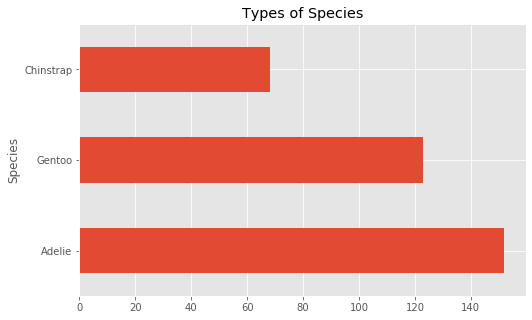

In [16]:
#collapse
df['species'].value_counts().plot(kind='barh')
plt.ylabel("Species")
plt.title("Types of Species")

Text(0.5, 1.0, 'Types of islands')

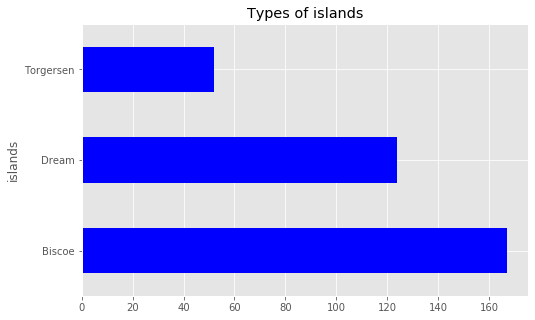

In [18]:
#collapse
df['island'].value_counts().plot(kind='barh',color='b')
plt.ylabel("islands")
plt.title("Types of islands")

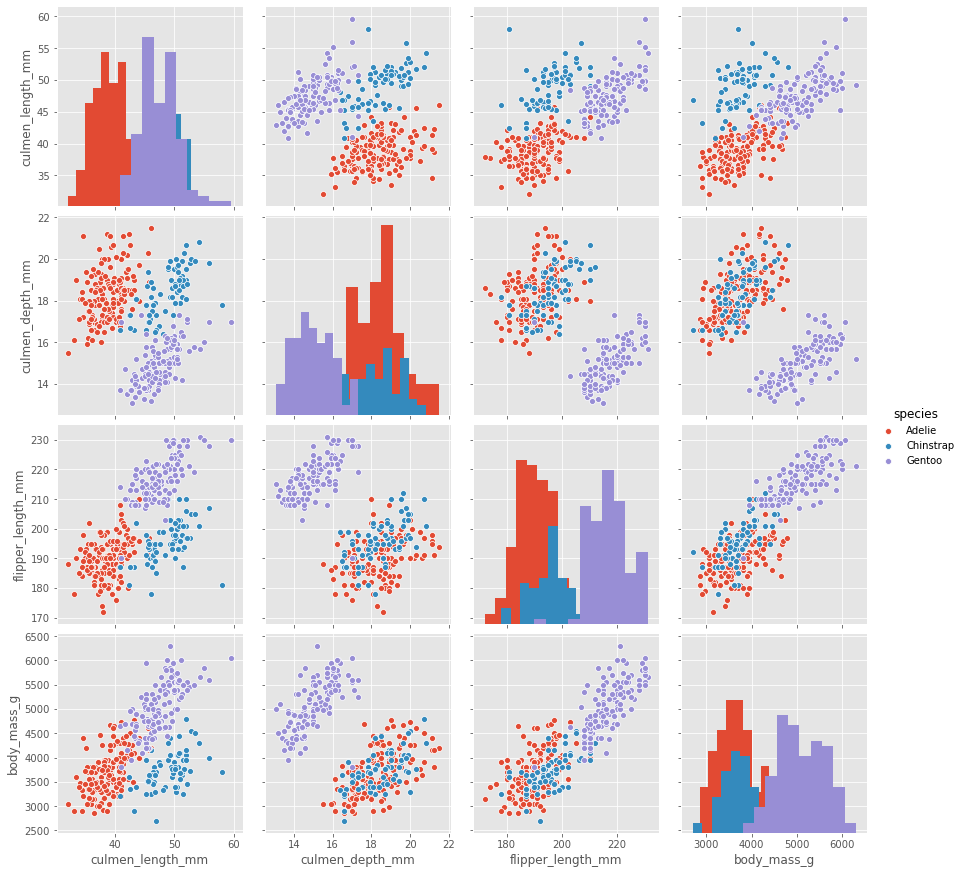

In [19]:
#collapse
sns.pairplot(df, hue="species", height=3,diag_kind="hist")

## Correlations between variables

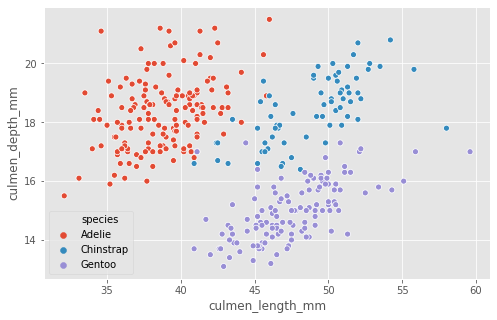

In [15]:
#collapse
ax = sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm",
                     hue="species", sizes=(10, 200),
                     data=df)

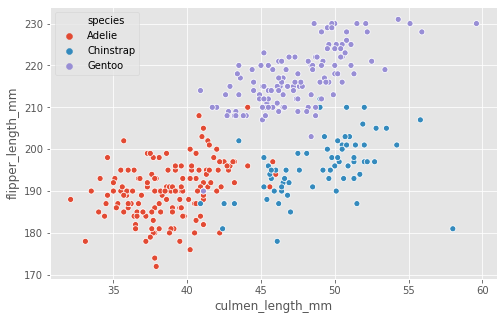

In [16]:
#collapse
ax = sns.scatterplot(x="culmen_length_mm", y="flipper_length_mm",
                     hue="species", sizes=(10, 200),
                     data=df)

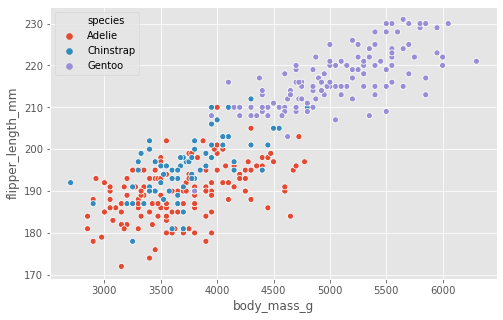

In [17]:
#collapse
sns.scatterplot(x="body_mass_g", y="flipper_length_mm",
                     hue="species", sizes=(10, 200),
                     data=df)

## Types on Species on each Island

In [18]:
#collapse
biscoe = df[df['island']=='Biscoe']
biscoe['species'].value_counts()

Gentoo    123
Adelie     44
Name: species, dtype: int64

In [19]:
#collapse
dream = df[df['island']=='Dream']
dream['species'].value_counts()

Chinstrap    68
Adelie       56
Name: species, dtype: int64

In [20]:
#collapse
torgersen = df[df['island']=='Torgersen']
torgersen['species'].value_counts()

Adelie    52
Name: species, dtype: int64

## Average Body Mass By Species

Here I am using pandas pivot table method.

In [21]:
#collapse
pivot = df.pivot_table(index=['species'], values=['body_mass_g'], aggfunc='mean')

print (pivot)

           body_mass_g
species               
Adelie     3701.315789
Chinstrap  3733.088235
Gentoo     5067.276423


we can see from above that the species Gentoo has highest average body mass.

## Correlation according to sex

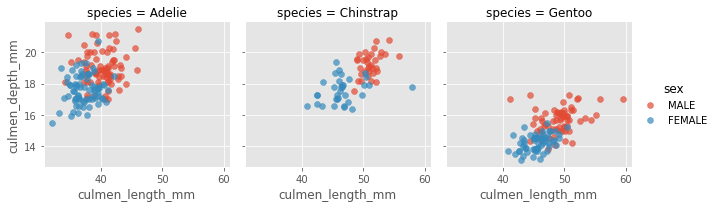

In [22]:
#collapse
g = sns.FacetGrid(df, col="species", hue="sex")
g.map(plt.scatter, "culmen_length_mm","culmen_depth_mm", alpha=.7)
g.add_legend();

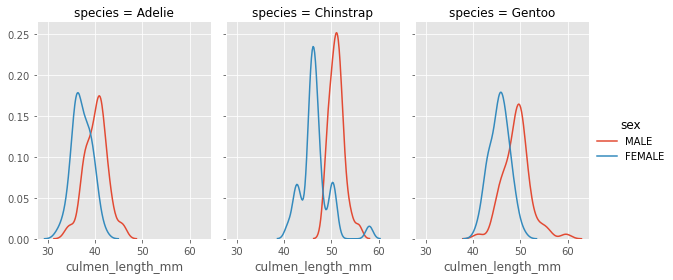

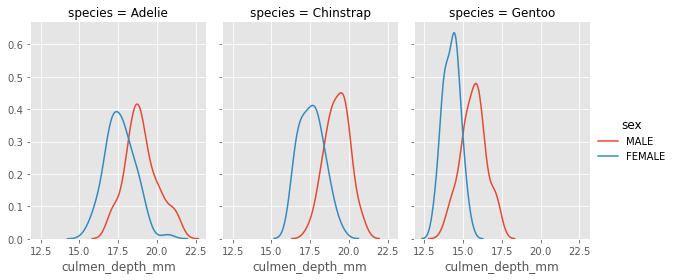

In [23]:
#collapse
g = sns.FacetGrid(df, col="species", hue="sex" ,height=4, aspect=.7)
g.map(sns.kdeplot,  "culmen_length_mm")
g.add_legend();

g = sns.FacetGrid(df, col="species", hue="sex",height=4, aspect=.7)
g.map(sns.kdeplot,  "culmen_depth_mm")
g.add_legend();

## Feature selection and model training.

Here i am using simple KNN classifier,SVM classifier(Support Vector Machine) and decision tree calssifier 
to classify the penguin species.

### KNN classifier

In [31]:
#collapse
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
train, test = train_test_split(df, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(240, 7)
(103, 7)


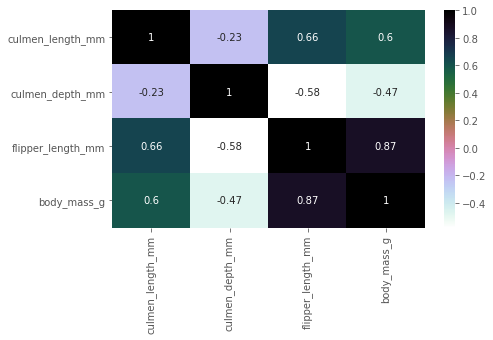

In [25]:
#collapse
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [44]:
#collapse
train_X = train[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]# taking the training data features
train_y=train.species# output of our training data
test_X= test[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']] # taking test data features
test_y =test.species   #output value of test data

In [55]:
#collapse
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(train_X, train_y) 
  
# accuracy on X_test 
accuracy = knn.score(test_X, test_y) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(test_X)  
cm = confusion_matrix(test_y, knn_predictions) 

0.7961165048543689


In [56]:
#collapse
print('CONFUSION MATRIX')
print(cm)

CONFUSION MATRIX
[[40  0  2]
 [17  8  1]
 [ 1  0 34]]


In [57]:
#collapse
print('CLASSIFICATION REPORT\n')
print(classification_report(test_y, knn_predictions))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

      Adelie       0.69      0.95      0.80        42
   Chinstrap       1.00      0.31      0.47        26
      Gentoo       0.92      0.97      0.94        35

    accuracy                           0.80       103
   macro avg       0.87      0.74      0.74       103
weighted avg       0.85      0.80      0.77       103



### SVM classifier

In [59]:
#collapse
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(train_X, train_y) 
svm_predictions = svm_model_linear.predict(test_X) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(test_X,test_y) 
print(accuracy)
  
# creating a confusion matrix 
cm = confusion_matrix(test_y, svm_predictions) 

0.9902912621359223


In [60]:
#collapse
print('CONFUSION MATRIX')
print(cm)

CONFUSION MATRIX
[[42  0  0]
 [ 1 25  0]
 [ 0  0 35]]


In [61]:
#collapse
print('CLASSIFICATION REPORT\n')
print(classification_report(test_y,  svm_predictions))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        42
   Chinstrap       1.00      0.96      0.98        26
      Gentoo       1.00      1.00      1.00        35

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



### Decision tree classifier

In [63]:
#collapse
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(train_X, train_y) 
dtree_predictions = dtree_model.predict(test_X) 
  
# creating a confusion matrix 
cm = confusion_matrix(test_y, dtree_predictions) 

In [65]:
#collapse
accuracy = dtree_model.score(test_X,test_y) 
print(accuracy)

0.941747572815534


In [64]:
#collapse
print('CONFUSION MATRIX')
print(cm)

CONFUSION MATRIX
[[39  3  0]
 [ 3 23  0]
 [ 0  0 35]]


In [66]:
#collapse
print('CLASSIFICATION REPORT\n')
print(classification_report(test_y,  dtree_predictions))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        42
   Chinstrap       0.88      0.88      0.88        26
      Gentoo       1.00      1.00      1.00        35

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103

